Importing Libraries
===========

In [1]:
from sklearn import datasets, neighbors
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

kNN classifier
============

Prepare dataset

First we will prepare the dataset. The dataset we choose is a modified  version of the [Iris dataset](https://archive.ics.uci.edu/ml/datasets/Iris). We choose only the first two input feature dimensions viz _sepal-length_ and _sepal-width_ (both in cm) for ease of visualization. 

In [2]:
iris = datasets.load_iris()
print("Features",iris.feature_names,"\nTarget values",iris.target_names)

x = iris.data[:,0:2]
y = iris.target[:]

x_train, x_test, y_train, y_test = tts(x,y, test_size=.25, shuffle=True,
                                       random_state=9)

Features ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
Target values ['setosa' 'versicolor' 'virginica']


Visualising data
========

In [3]:
x_class0 = []; y_class0 = [];
x_class1 = []; y_class1 = [];
x_class2 = []; y_class2 = [];

for i in range(0,len(x_train)):
    if y_train[i] == 0:
        x_class0.append(x_train[i])
        y_class0.append(y_train[i])
    elif y_train[i] == 1:
        x_class1.append(x_train[i])
        y_class1.append(y_train[i])
    else:
        x_class2.append(x_train[i])
        y_class2.append(y_train[i])

# converting lists to matrix
# models accept the i/p as matrix
# matplotlib needs i/p as array
x_class0 = np.asmatrix(x_class0); y_class0 = np.asmatrix(y_class0);
x_class1 = np.asmatrix(x_class1); y_class1 = np.asmatrix(y_class1);
x_class2 = np.asmatrix(x_class2); y_class2 = np.asmatrix(y_class2);

[]

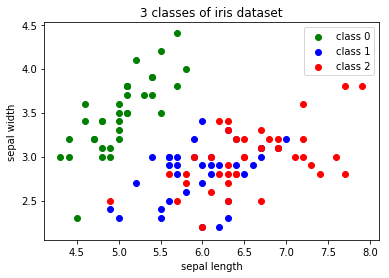

In [4]:
plt.figure()
# plotting sepal length vs sepal width
plt.scatter(np.asarray(x_class0[:,0]),np.asarray(x_class0[:,1]), color='green')
plt.scatter(np.asarray(x_class1[:,0]),np.asarray(x_class1[:,1]), color='blue')
plt.scatter(np.asarray(x_class2[:,0]),np.asarray(x_class2[:,1]), color='red')

plt.legend(['class 0','class 1','class 2'])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("3 classes of iris dataset")
plt.plot()

k Nearest Neighbour classifier
=============

In [5]:
# specifying k no. of neighbours near the query point here k = 5
model = neighbors.KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Visualize the working of the algorithm
=====================
We choose the first point in the test set as our query point.

In [6]:
query_point = np.array([5.8,2.7])
true_class_of_query_point = 1
predicted_class_for_query_point = model.predict([query_point])
print("Query point: {}".format(query_point))
print("True class of query point: {}".
      format(true_class_of_query_point))
print("Predicted class for query point: {}".
      format(predicted_class_for_query_point))

Query point: [5.8 2.7]
True class of query point: 1
Predicted class for query point: [1]


Visualising Query point and nearest neighbours
=========

In [7]:
# neighbours object
neighbors_obj = neighbors.NearestNeighbors(n_neighbors=6)
neighbors_obj.fit(x_train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=6, p=2, radius=1.0)

In [8]:
# NN = Nearest Neighbours
dist_of_NN, indices_of_NN_of_query_point = neighbors_obj.kneighbors([query_point])
print(dist_of_NN)
print(indices_of_NN_of_query_point)

[[0.         0.1        0.1        0.14142136 0.2        0.2236068 ]]
[[ 86  62 110  74  39  31]]


In [9]:
# analyzing a query point
NN_of_query_point = x_train[indices_of_NN_of_query_point[0]]
NN_of_query_point

array([[5.8, 2.7],
       [5.8, 2.8],
       [5.8, 2.6],
       [5.7, 2.8],
       [6. , 2.7],
       [5.7, 2.9]])

In [10]:
print("The classes of the nearest neighbors are: {}\n"
      .format(y_train[indices_of_NN_of_query_point[0]]))
print("Predicted class for query point: {}"
      .format(predicted_class_for_query_point[0]))

The classes of the nearest neighbors are: [2 2 1 1 1 1]

Predicted class for query point: 1


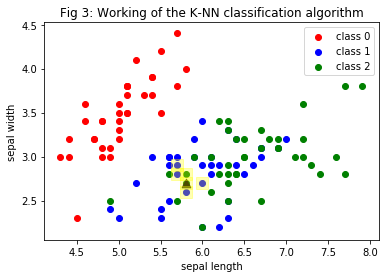

In [11]:
plt.scatter(np.asarray(x_class0[:,0]), np.asarray(x_class0[:,1]),color='red')
plt.scatter(np.asarray(x_class1[:,0]), np.asarray(x_class1[:,1]),color='blue')
plt.scatter(np.asarray(x_class2[:,0]), np.asarray(x_class2[:,1]),color='green')
plt.scatter(query_point[0], query_point[1],marker='^',s=75,color='black')
plt.scatter(NN_of_query_point[:,0], NN_of_query_point[:,1]
            ,marker='s',s=150,color='yellow',alpha=0.30)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(['class 0','class 1','class 2'])
plt.title('Fig 3: Working of the K-NN classification algorithm')
plt.show()

Evaluating model
========

In [12]:
def test_kNN_performance(model, x_test, y_test):
    test_pred = []
    misclassifications = 0
    
    for i in range(len(x_test)):
        # note we need to pass a matrix
        test_pred.append(model.predict(np.asmatrix(x_test[i])))
        
        # counting misclassifications
        if y_test[i] != test_pred[i]:
            misclassifications += 1
    print("No. of misclassifications: ",misclassifications)
    print("Total test units: ",len(y_test))

    m = (misclassifications/len(y_test))*100
    print("Total % of misclassification: ",m)
    return m

In [13]:
# evaluating the model
m = test_kNN_performance(model, x_test, y_test)

No. of misclassifications:  7
Total test units:  38
Total % of misclassification:  18.421052631578945
